<a href="https://colab.research.google.com/github/anushka1947/Machine-Learning/blob/main/Missile_Data_Analysis_%26_Prediction_Using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exploring the Dataset


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
from google.colab import files
df=files.upload()

Saving missile_test_data.csv to missile_test_data.csv


In [6]:
df=pd.read_csv('missile_test_data.csv')
print(df.head())

   Altitude_km  Velocity_mps   Payload_kg  Fuel_Type  Launch_Angle_deg  \
0   218.543053   5188.970284  1007.151351          3         52.824811   
1   477.821438   4216.578198  2755.314642          1         27.216150   
2   379.397274   2857.165698  4377.434596          1         10.969662   
3   319.396318   5882.770118  3687.901943          3         29.296117   
4   120.208388   5108.387035  4052.149625          0         88.069900   

   Launch_Site  Weather_Temp_C  Weather_WindSpeed_mps  Weather_Humidity  \
0            0       37.926325              20.181090         35.786759   
1            0       33.516946              23.900442         82.237628   
2            0       20.147027               7.514037         99.751411   
3            0       46.923300              18.746223         12.702340   
4            3       -5.966784              17.152379         90.762928   

   Guidance_Type  Result  
0              1       1  
1              0       1  
2              3       

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Altitude_km            500 non-null    float64
 1   Velocity_mps           500 non-null    float64
 2   Payload_kg             500 non-null    float64
 3   Fuel_Type              500 non-null    int64  
 4   Launch_Angle_deg       500 non-null    float64
 5   Launch_Site            500 non-null    int64  
 6   Weather_Temp_C         500 non-null    float64
 7   Weather_WindSpeed_mps  500 non-null    float64
 8   Weather_Humidity       500 non-null    float64
 9   Guidance_Type          500 non-null    int64  
 10  Result                 500 non-null    int64  
dtypes: float64(7), int64(4)
memory usage: 43.1 KB
None


In [8]:
print(df.isnull().sum())

Altitude_km              0
Velocity_mps             0
Payload_kg               0
Fuel_Type                0
Launch_Angle_deg         0
Launch_Site              0
Weather_Temp_C           0
Weather_WindSpeed_mps    0
Weather_Humidity         0
Guidance_Type            0
Result                   0
dtype: int64


Exploratory Data Analysis (EDA)

<ipython-input-9-bf3b44f1cf24>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Result',data=df,palette='coolwarm')


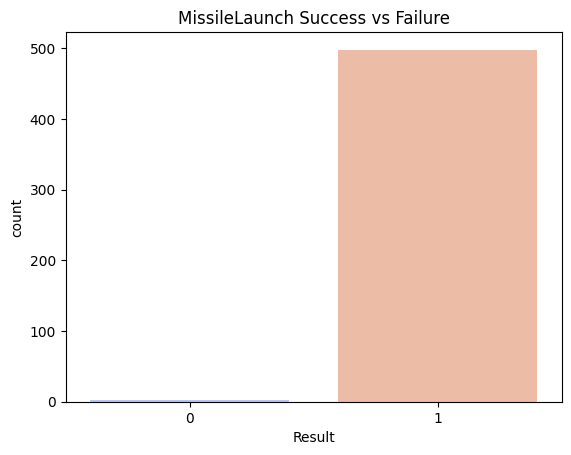

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

#Count Success Vs Failure
sns.countplot(x='Result',data=df,palette='coolwarm')
plt.title("MissileLaunch Success vs Failure")
plt.show()

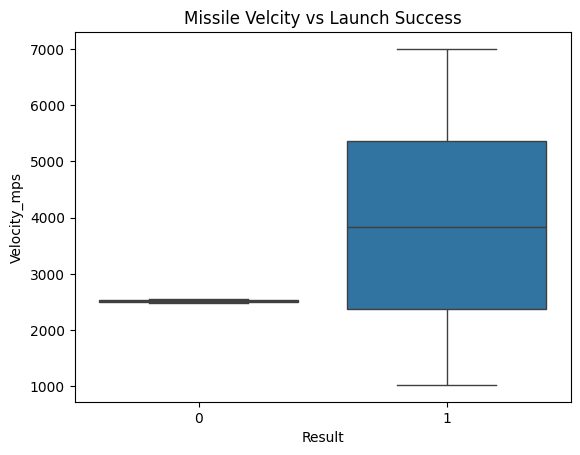

In [10]:
#Boxplot: Velocity vs Success
sns.boxplot(x='Result',y='Velocity_mps' , data=df)
plt.title('Missile Velcity vs Launch Success')
plt.show()

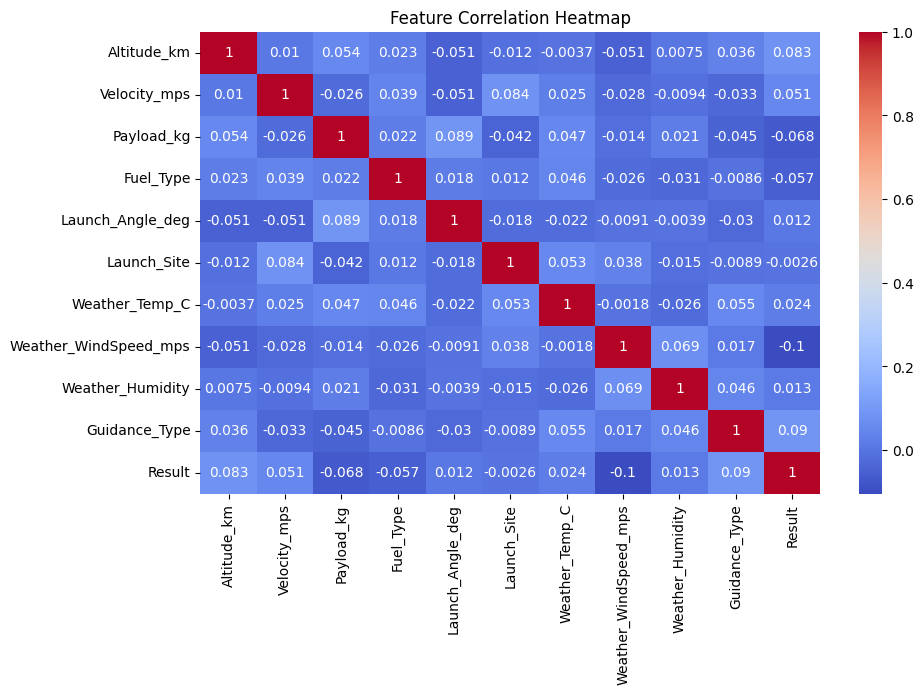

In [11]:
#Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True ,cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

Feature Engineering & Data Preprocessing



In [12]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()


df['Launch_Site']= label_enc.fit_transform(df['Launch_Site'])
df['Guidance_Type']=label_enc.fit_transform(df['Guidance_Type'])
df["Fuel_type"]=label_enc.fit_transform(df['Fuel_Type'])

print(df.head())

   Altitude_km  Velocity_mps   Payload_kg  Fuel_Type  Launch_Angle_deg  \
0   218.543053   5188.970284  1007.151351          3         52.824811   
1   477.821438   4216.578198  2755.314642          1         27.216150   
2   379.397274   2857.165698  4377.434596          1         10.969662   
3   319.396318   5882.770118  3687.901943          3         29.296117   
4   120.208388   5108.387035  4052.149625          0         88.069900   

   Launch_Site  Weather_Temp_C  Weather_WindSpeed_mps  Weather_Humidity  \
0            0       37.926325              20.181090         35.786759   
1            0       33.516946              23.900442         82.237628   
2            0       20.147027               7.514037         99.751411   
3            0       46.923300              18.746223         12.702340   
4            3       -5.966784              17.152379         90.762928   

   Guidance_Type  Result  Fuel_type  
0              1       1          3  
1              0       1    

Split Data for Training & Testing

In [13]:
from sklearn.model_selection import train_test_split

x=df.drop(columns=['Result'])
y=df['Result']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

Train ML Models
Using Random Forest model,XGBoost model

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_model=RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(x_train ,y_train)
y_pred_rf=rf_model.predict(x_test)

accuracy_rf=accuracy_score(y_test,y_pred_rf)
print(f'Random Forest Model Accuracy: {accuracy_rf: 2f}')

Random Forest Model Accuracy:  0.990000


In [18]:
from xgboost import XGBClassifier
xgb_model=XGBClassifier(n_estimators=100,learning_rate=0.1,random_state=42)
xgb_model.fit(x_train,y_train)
y_pred_xgb=xgb_model.predict(x_test)

accuracy_xgb=accuracy_score(y_test,y_pred_xgb)
print(f"XGBoost Model Accuracy : {accuracy_xgb: 2f}")

XGBoost Model Accuracy :  0.990000


Model Evaluation & Improvement

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.99      1.00      0.99        99

    accuracy                           0.99       100
   macro avg       0.49      0.50      0.50       100
weighted avg       0.98      0.99      0.99       100

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.99      1.00      0.99        99

    accuracy                           0.99       100
   macro avg       0.49      0.50      0.50       100
weighted avg       0.98      0.99      0.99       100



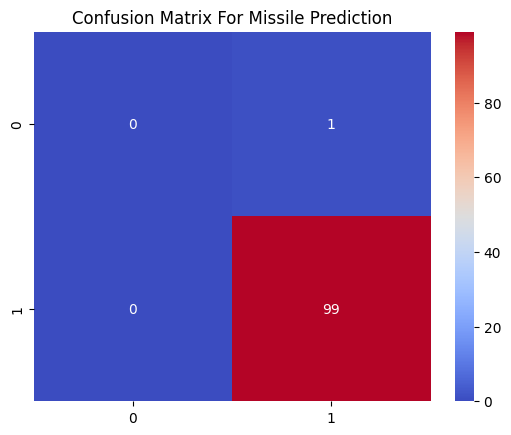

In [20]:
from sklearn.metrics import confusion_matrix,classification_report

print('Random Forest Classification Report:\n', classification_report(y_test,y_pred_rf))
print('XGBoost Classification Report:\n',classification_report(y_test,y_pred_xgb))


import seaborn as sns
conf_matrix=confusion_matrix(y_test,y_pred_xgb)
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='coolwarm')
plt.title('Confusion Matrix For Missile Prediction')
plt.show()


In [23]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid = GridSearchCV(XGBClassifier(), params, cv=5)
grid.fit(x_train, y_train)

# Best parameters
print("Best Hyperparameters:", grid.best_params_)

# Best model accuracy
best_xgb = grid.best_estimator_
y_pred_best = best_xgb.predict(x_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Tuned XGBoost Accuracy: {accuracy_best:.2f}")


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Tuned XGBoost Accuracy: 0.99


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
27 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
27 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/xgboost/core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py", line 1559, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Ex

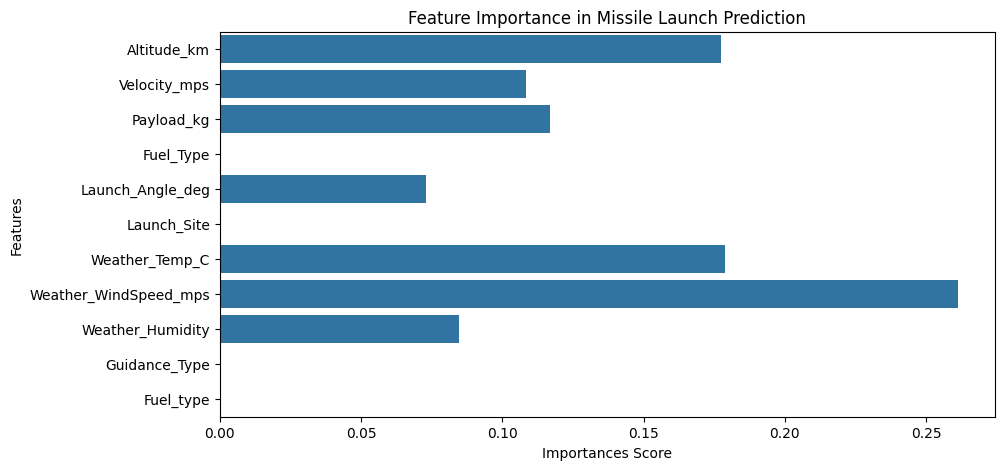

In [26]:
importances = xgb_model.feature_importances_
features =x.columns

plt.figure(figsize=(10,5))
sns.barplot(x=importances,y=features)
plt.xlabel('Importances Score')
plt.ylabel('Features')
plt.title('Feature Importance in Missile Launch Prediction')
plt.show()

# New Section